In [36]:
## pip install tensorflow-gpu

In [37]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [39]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
## Divide the dataset into independent and dependent features

X = df.iloc[:,3:13] # It will give all rows and all columns excluding columns with index 0-2 and 13
Y  = df.iloc[:,13] # Assign Y the value of column at index 13

In [41]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [42]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [43]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [44]:
X = pd.concat([X,geography,gender], axis=1)

In [45]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [47]:
from pandas.core.common import standardize_mapping
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [49]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [50]:
X_train.shape

(8000, 11)

In [51]:
## Creating ANN (Artificial Neural Network)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,ELU,PReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [53]:
## Initialize the ANN
classifier = Sequential()

In [54]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.2))

In [55]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [56]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [57]:
## Adding the output layer 
classifier.add(Dense(units=1,activation='sigmoid'))

In [58]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
## Early Stopping - Stop training when a monitored metric has stopped improving.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [60]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5356 - accuracy: 0.7755 - val_loss: 0.4603 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4595 - accuracy: 0.7962 - val_loss: 0.4388 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4495 - accuracy: 0.8022 - val_loss: 0.4299 - val_accuracy: 0.8088
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4375 - accuracy: 0.8099 - val_loss: 0.4251 - val_accuracy: 0.8167
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4305 - accuracy: 0.8125 - val_loss: 0.4192 - val_accuracy: 0.8209
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4271 - accuracy: 0.8192 - val_loss: 0.4151 - val_accuracy: 0.8243
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4222 - accuracy: 0.8205 - val_loss: 0.4109 - val_accuracy:

In [61]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

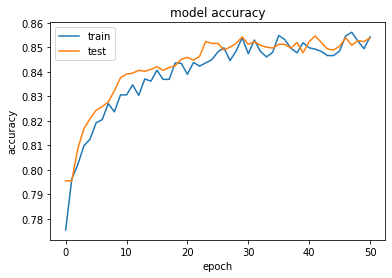

In [62]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

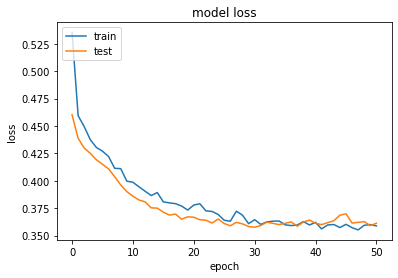

In [63]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
 ## Making predictions on test data
 y_pred = classifier.predict(X_test)
 y_pred = (y_pred>=0.5)

In [65]:
## Creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1550,   45],
       [ 218,  187]])

In [66]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test,y_pred)
score

0.8685

In [67]:
## Get the Weights
classifier.get_weights()

[array([[ 1.23238899e-01,  1.80715844e-02,  6.35764934e-03,
          4.93260324e-02,  1.66946352e-01,  3.93814035e-02,
         -3.27540934e-02,  4.17699525e-03, -4.99411952e-03,
          7.50206262e-02, -2.35298090e-02],
        [-7.20001340e-01,  3.59377831e-01,  2.05841418e-02,
          2.65176315e-02, -7.77013004e-01, -7.21000135e-01,
          3.10907811e-01, -8.43317628e-01, -2.23370045e-01,
         -9.35765147e-01,  7.43277818e-02],
        [ 2.62285005e-02, -3.19993757e-02,  1.39590586e-02,
          1.25052497e-01, -6.24368340e-03,  7.72775384e-03,
          1.99350268e-01, -1.77444920e-01,  1.45291621e-02,
          4.73160334e-02, -2.90790573e-02],
        [-2.52214670e-01, -6.91327825e-02, -8.67396533e-01,
         -3.44330788e-01, -7.90679175e-03, -1.16855294e-01,
         -2.84768522e-01,  6.41382113e-02,  1.50079414e-01,
         -2.97388941e-01,  1.56680673e-01],
        [ 1.99334234e-01, -2.27388680e-01, -9.53215957e-01,
          4.34645683e-01,  1.48336515e-02,  